In [233]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import random

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimsunhee","key":"5d873ecbd75fa0fb5ee4a42d5e533f5d"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
ls

drive/  kaggle.json  sample_data/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         49           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         76           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        587           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        111           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1133           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13119           False  
house-pr

In [ ]:
!kaggle datasets download -d sarabhian/coswara-dataset-heavy-cough

 98% 619M/632M [00:33<00:00, 15.7MB/s]
100% 632M/632M [00:33<00:00, 19.7MB/s]


In [ ]:
ls

coswara-dataset-heavy-cough.zip  drive/  kaggle.json  sample_data/


In [ ]:
!unzip coswara-dataset-heavy-cough.zip

Archive:  coswara-dataset-heavy-cough.zip
  inflating: coswara_data/kaggle_data/00xKcQMmcAhX8CODgBBLOe7Dm0T2/cough.wav  
  inflating: coswara_data/kaggle_data/01OCEf1yB4czsq8ygRoT51s96Ba2/cough.wav  
  inflating: coswara_data/kaggle_data/01n0u9YSkXQSkmN45J65eigyCMC3/cough.wav  
  inflating: coswara_data/kaggle_data/03TmwzsdEBVEh35MRMbC9d0NnfI3/cough.wav  
  inflating: coswara_data/kaggle_data/05acPS4aRGfvuOfku11Za8zve8i2/cough.wav  
  inflating: coswara_data/kaggle_data/05bieNLXPuaIWEVaX81EkbbjVrh1/cough.wav  
  inflating: coswara_data/kaggle_data/08tlSbvXpAggZavIGW994adhh1m1/cough.wav  
  inflating: coswara_data/kaggle_data/0B1rE91KabdId1lUmWJB7NLg8OP2/cough.wav  
  inflating: coswara_data/kaggle_data/0EAAFsDWfTcrhktHy78LS6nf19G3/cough.wav  
  inflating: coswara_data/kaggle_data/0HIgO2EhOOW1msCbEw1kC8Qsx6D3/cough.wav  
  inflating: coswara_data/kaggle_data/0Ha52POVIxTKEPqI1eGpIoMHUd52/cough.wav  
  inflating: coswara_data/kaggle_data/0Js6ZUZQ9NUnu568Fh7B6mZ1R8o1/cough.wav  
  inflatin

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YrJHnx1PgzPLiCgkSLaQqMhyBeA2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YuahWhZmLgMcw3hpc83mcz06bMS2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YvhPqG9MqhbjHErOmOctaNdVdJZ2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YwhRHergRUamkPHHq2Vo5LA0WIw1/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/YzKbMCpZxMRoab1o1d03S6e8T5P2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z0JZ3bVzYZcEx2GkbTKAyWbyC2J3/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z5Y8ewskqQWeyIFkqRKuwGz9fCv1/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z6qimRi4c2NDdPHsocMRk9IlgdH2/cough.wav
/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data/Z7ZMrrVuJKSK1JEfLQjxGXI1VTq1/cough.wav
/content/d

In [ ]:
!cp -r /content/drive/MyDrive/Colab Notebooks/sesac /csvs

cp: target '/csvs' is not a directory


In [ ]:
data_path = "/content/coswara_data/kaggle_data"
csvs_path = "./csvs"

In [ ]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-38:-10] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-38:-10])
dff.head()

total files : 2313
path of file at loc [0] : /content/coswara_data/kaggle_data/nPnKdupHeJQ46bqslx7STREbkXt2/cough.wav
id of file at loc[0] nPnKdupHeJQ46bqslx7STREbkXt2


id  \
0  nPnKdupHeJQ46bqslx7STREbkXt2   
1  BRi5khF6PxMORMTOXjeS6r2dNqt1   
2  t6twqoKKSMOJdmehEj2gbVo6Lao2   
3  dFtGnzYqh1NVAwQUQ3wkysqAe3n1   
4  TwPNsIPNCxTzkSKcEQEy4zNqrNb2   

                                                path  
0  /content/coswara_data/kaggle_data/nPnKdupHeJQ4...  
1  /content/coswara_data/kaggle_data/BRi5khF6PxMO...  
2  /content/coswara_data/kaggle_data/t6twqoKKSMOJ...  
3  /content/coswara_data/kaggle_data/dFtGnzYqh1NV...  
4  /content/coswara_data/kaggle_data/TwPNsIPNCxTz...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = librosa.load(dff.path.loc[1],sr = 22050)
ipd.Audio(dff.path.loc[1])

In [ ]:
csv_files =[]
for dirpath, subdirs, files in os.walk(csvs_path):
    csv_files.extend(os.path.join(dirpath, x) for x in files if x.endswith(".csv"))
csv_files

['./csvs/20200416.csv',
 './csvs/20210618.csv',
 './csvs/20210603.csv',
 './csvs/20200803.csv',
 './csvs/20201130.csv',
 './csvs/20210419.csv',
 './csvs/20200502.csv',
 './csvs/20210523.csv',
 './csvs/20200419.csv',
 './csvs/20200415.csv',
 './csvs/20210507.csv',
 './csvs/20200820.csv',
 './csvs/20210426.csv',
 './csvs/20200417.csv',
 './csvs/20200911.csv',
 './csvs/20200504.csv',
 './csvs/20210630.csv',
 './csvs/20200505.csv',
 './csvs/20200930.csv',
 './csvs/20201221.csv',
 './csvs/20210406.csv',
 './csvs/20200919.csv',
 './csvs/20200604.csv',
 './csvs/20210830.csv',
 './csvs/20200418.csv',
 './csvs/20210206.csv',
 './csvs/20200525.csv',
 './csvs/train.csv',
 './csvs/20210914.csv',
 './csvs/20220116.csv',
 './csvs/20200424.csv',
 './csvs/20210816.csv',
 './csvs/20200430.csv',
 './csvs/20200824.csv',
 './csvs/20200707.csv',
 './csvs/20200814.csv',
 './csvs/20210714.csv',
 './csvs/tdf.csv',
 './csvs/20200413.csv',
 './csvs/20200901.csv',
 './csvs/20201031.csv',
 './csvs/new.csv',
 './c

In [ ]:
pwd

'/content'

In [ ]:
print("total present csvs :", len(os.listdir(csvs_path)))

total present csvs : 46


In [ ]:
all_files=[]
for files in os.listdir(csvs_path):
    if files[-3:]=="csv":
        all_files.append(files)
all_files.sort()
all_files

['20200413.csv',
 '20200415.csv',
 '20200416.csv',
 '20200417.csv',
 '20200418.csv',
 '20200419.csv',
 '20200424.csv',
 '20200430.csv',
 '20200502.csv',
 '20200504.csv',
 '20200505.csv',
 '20200525.csv',
 '20200604.csv',
 '20200707.csv',
 '20200720.csv',
 '20200803.csv',
 '20200814.csv',
 '20200820.csv',
 '20200824.csv',
 '20200901.csv',
 '20200911.csv',
 '20200919.csv',
 '20200930.csv',
 '20201012.csv',
 '20201031.csv',
 '20201130.csv',
 '20201221.csv',
 '20210206.csv',
 '20210406.csv',
 '20210419.csv',
 '20210426.csv',
 '20210507.csv',
 '20210523.csv',
 '20210603.csv',
 '20210618.csv',
 '20210630.csv',
 '20210714.csv',
 '20210816.csv',
 '20210830.csv',
 '20210914.csv',
 '20210930.csv',
 '20220116.csv']

In [ ]:
os.chdir(csvs_path)

df_list =[]
for i in range(len(all_files)):
    temp_df = pd.read_csv(all_files[i])
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True, sort=False)
df.head()

id    l_c   a record_date covid_status    iF ep  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  India  24  2020-04-13      healthy  True  y   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  India  72  2020-04-13      healthy  True  y   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  India  54  2020-04-13      healthy  True  y   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  India  31  2020-04-13      healthy  True  y   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  India  26  2020-04-13      healthy  True  y   

      g          l_s   dT  ... test_status diarrhoea ctScan vacc testType  \
0  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
1  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
2  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
3  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
4  male      Haryana  web  ...         NaN       NaN    NaN  NaN      NaN   

  test_date others_preexist ctDate ctScore  others_resp  
0       NaN             NaN    NaN     NaN          NaN  
1       NaN             NaN    NaN     NaN          NaN  
2       NaN             NaN    NaN     NaN          NaN  
3       NaN             NaN    NaN     NaN          NaN  
4       NaN             NaN    NaN     NaN          NaN  

[5 rows x 41 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2374 non-null   object 
 1   l_c              2374 non-null   object 
 2   a                2374 non-null   int64  
 3   record_date      2374 non-null   object 
 4   covid_status     2374 non-null   object 
 5   iF               76 non-null     object 
 6   ep               2374 non-null   object 
 7   g                2374 non-null   object 
 8   l_s              2374 non-null   object 
 9   dT               1770 non-null   object 
 10  l_l              2113 non-null   object 
 11  diabetes         196 non-null    object 
 12  asthma           119 non-null    object 
 13  smoker           714 non-null    object 
 14  ht               193 non-null    object 
 15  fever            264 non-null    object 
 16  date             604 non-null    object 
 17  cld           

In [ ]:
df['str_date']=pd.to_datetime(df['record_date'])
df['date']=df['str_date'].dt.strftime('%Y%m%d')
df.head(10)

id     l_c   a record_date  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2   India  24  2020-04-13   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2   India  72  2020-04-13   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2   India  54  2020-04-13   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2   India  31  2020-04-13   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2   India  26  2020-04-13   
5  htQzROl26OWQpIYFDzv11F79PLR2   India  24  2020-04-13   
6  pW9mCAeWYiMoM7wW7riLvNRbYDO2   India  37  2020-04-13   
7  Eu11s84cuBTiPXTAtVf9mj3GkqA2  Canada  23  2020-04-13   
8  L7S8iIPKgiO6QWLC3mGkROCMa0s1   India  40  2020-04-13   
9  eP8gEM0KcBU6S5JpMdycX74KP3p2   India  32  2020-04-13   

                  covid_status    iF ep     g          l_s   dT  ...  \
0                      healthy  True  y  male    Karnataka  web  ...   
1                      healthy  True  y  male  Maharashtra  web  ...   
2                      healthy  True  y  male  Maharashtra  web  ...   
3                      healthy  True  y  male    Karnataka  web  ...   
4                      healthy  True  y  male      Haryana  web  ...   
5                      healthy  True  y  male    Karnataka  web  ...   
6                      healthy  True  y  male  Maharashtra  web  ...   
7                      healthy  True  y  male      Ontario  web  ...   
8  resp_illness_not_identified  True  y  male      Gujarat  web  ...   
9                      healthy  True  y  male    Telangana  web  ...   

  diarrhoea ctScan vacc testType test_date others_preexist ctDate ctScore  \
0       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
1       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
2       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
3       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
4       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
5       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
6       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
7       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
8       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
9       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   

  others_resp   str_date  
0         NaN 2020-04-13  
1         NaN 2020-04-13  
2         NaN 2020-04-13  
3         NaN 2020-04-13  
4         NaN 2020-04-13  
5         NaN 2020-04-13  
6         NaN 2020-04-13  
7         NaN 2020-04-13  
8         NaN 2020-04-13  
9         NaN 2020-04-13  

[10 rows x 42 columns]

In [ ]:
tdf = pd.merge(dff ,df , on = 'id')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2312 non-null   object        
 1   path             2312 non-null   object        
 2   l_c              2312 non-null   object        
 3   a                2312 non-null   int64         
 4   record_date      2312 non-null   object        
 5   covid_status     2312 non-null   object        
 6   iF               76 non-null     object        
 7   ep               2312 non-null   object        
 8   g                2312 non-null   object        
 9   l_s              2312 non-null   object        
 10  dT               1708 non-null   object        
 11  l_l              2061 non-null   object        
 12  diabetes         194 non-null    object        
 13  asthma           116 non-null    object        
 14  smoker           652 non-null    object 

In [ ]:
tdf.head()

id  \
0  nPnKdupHeJQ46bqslx7STREbkXt2   
1  BRi5khF6PxMORMTOXjeS6r2dNqt1   
2  t6twqoKKSMOJdmehEj2gbVo6Lao2   
3  dFtGnzYqh1NVAwQUQ3wkysqAe3n1   
4  TwPNsIPNCxTzkSKcEQEy4zNqrNb2   

                                                path    l_c   a record_date  \
0  /content/coswara_data/kaggle_data/nPnKdupHeJQ4...  India  38  2020-05-02   
1  /content/coswara_data/kaggle_data/BRi5khF6PxMO...  India  44  2020-04-14   
2  /content/coswara_data/kaggle_data/t6twqoKKSMOJ...  India  20  2020-08-27   
3  /content/coswara_data/kaggle_data/dFtGnzYqh1NV...  India  25  2021-07-29   
4  /content/coswara_data/kaggle_data/TwPNsIPNCxTz...  India  30  2021-05-26   

              covid_status   iF ep       g        l_s  ... diarrhoea ctScan  \
0                  healthy  NaN  y    male  Karnataka  ...       NaN    NaN   
1                  healthy  NaN  y    male  Karnataka  ...       NaN    NaN   
2                  healthy  NaN  y    male  Telangana  ...       NaN    NaN   
3           positive_asymp  NaN  y    male      Assam  ...       NaN      n   
4  no_resp_illness_exposed  NaN  y  female     Kerala  ...       NaN    NaN   

  vacc testType   test_date others_preexist ctDate ctScore others_resp  \
0  NaN      NaN         NaN             NaN    NaN     NaN         NaN   
1  NaN      NaN         NaN             NaN    NaN     NaN         NaN   
2  NaN      NaN         NaN             NaN    NaN     NaN         NaN   
3    y    rtpcr  2021-07-22             NaN    NaN     NaN         NaN   
4  NaN      NaN         NaN             NaN    NaN     NaN         NaN   

    str_date  
0 2020-05-02  
1 2020-04-14  
2 2020-08-27  
3 2021-07-29  
4 2021-05-26  

[5 rows x 43 columns]

In [ ]:
tdf.to_csv('tdf.csv',index=False)

In [347]:
tdf=pd.read_csv('/content/csvs/tdf.csv')

In [348]:
data = librosa.load(tdf.path.loc[1343],sr =22050)
ipd.Audio(tdf['path'].loc[1343])

In [349]:
df = tdf.copy()
df['status']=0
for i in range(0,2312):
    if ((df.covid_status.loc[i]!='positive_mild') or (df.covid_status.loc[i]!='positive_moderate') or (df.covid_status.loc[i]!='positive_asymp')):
        df["status"].loc[i]='negative'
    
    if ((df.covid_status.loc[i]=='positive_mild') or (df.covid_status.loc[i]=='positive_moderate') or (df.covid_status.loc[i]=='positive_asymp')):
        df["status"].loc[i]='positive' 

In [ ]:
df["status"]!='positive' 

0        True
1        True
2        True
3       False
4        True
        ...  
2307    False
2308     True
2309     True
2310     True
2311     True
Name: status, Length: 2312, dtype: bool

In [350]:
df[df['status']=='negative'].count()

id                 1829
path               1829
l_c                1829
a                  1829
record_date        1829
covid_status       1829
iF                   76
ep                 1829
g                  1829
l_s                1829
dT                 1226
l_l                1621
diabetes            111
asthma              106
smoker              353
ht                  122
fever                52
date               1829
cld                  34
ihd                  16
fV                 1150
rU                 1150
cold                122
cough               156
test                  1
loss_of_smell        23
pneumonia            32
um                  794
bd                   91
st                   56
ftg                  60
mp                   59
test_status         511
diarrhoea             6
ctScan              236
vacc                236
testType            147
test_date           147
others_preexist      55
ctDate               50
ctScore              50
others_resp     

In [351]:
df[df['status']=='positive'].count()

id                 483
path               483
l_c                483
a                  483
record_date        483
covid_status       483
iF                   0
ep                 483
g                  483
l_s                483
dT                 482
l_l                440
diabetes            83
asthma              10
smoker             299
ht                  69
fever              196
date               483
cld                  4
ihd                 10
fV                 482
rU                 482
cold               195
cough              265
test                 0
loss_of_smell      110
pneumonia           12
um                 480
bd                  84
st                 131
ftg                179
mp                 153
test_status        388
diarrhoea           34
ctScan             293
vacc               293
testType           293
test_date          293
others_preexist     28
ctDate              84
ctScore             84
others_resp         11
str_date           483
status     

In [352]:
negative_df= df[df['status'] == 'negative'][0:483]
negative_df

id  \
0    nPnKdupHeJQ46bqslx7STREbkXt2   
1    BRi5khF6PxMORMTOXjeS6r2dNqt1   
2    t6twqoKKSMOJdmehEj2gbVo6Lao2   
4    TwPNsIPNCxTzkSKcEQEy4zNqrNb2   
6    ZHsY7y4Y8JOoafrQpOKJEr6gORq2   
..                            ...   
602  p5ZEeEq5AgbI7KMhSP9HTCXTDQ62   
603  xa2v8z3Yzgb9dFrq2gEZz6oS7fh1   
604  BjSaOnCo37bIz4AgpvWPiAYqwzA3   
605  hD3OkVpgQJNlJSQxLgzqXzHp4jr2   
606  ewjgkt6HqIQ24vpCKFBISsgr5gJ3   

                                                  path    l_c   a record_date  \
0    /content/coswara_data/kaggle_data/nPnKdupHeJQ4...  India  38  2020-05-02   
1    /content/coswara_data/kaggle_data/BRi5khF6PxMO...  India  44  2020-04-14   
2    /content/coswara_data/kaggle_data/t6twqoKKSMOJ...  India  20  2020-08-27   
4    /content/coswara_data/kaggle_data/TwPNsIPNCxTz...  India  30  2021-05-26   
6    /content/coswara_data/kaggle_data/ZHsY7y4Y8JOo...  India  41  2020-05-01   
..                                                 ...    ...  ..         ...   
602  /content/coswara_data/kaggle_data/p5ZEeEq5AgbI...  India  50  2020-05-01   
603  /content/coswara_data/kaggle_data/xa2v8z3Yzgb9...  India  26  2020-04-25   
604  /content/coswara_data/kaggle_data/BjSaOnCo37bI...  India  21  2021-06-26   
605  /content/coswara_data/kaggle_data/hD3OkVpgQJNl...  India  21  2020-04-30   
606  /content/coswara_data/kaggle_data/ewjgkt6HqIQ2...  India  19  2020-04-16   

                    covid_status   iF ep       g          l_s  ... ctScan  \
0                        healthy  NaN  y    male    Karnataka  ...    NaN   
1                        healthy  NaN  y    male    Karnataka  ...    NaN   
2                        healthy  NaN  y    male    Telangana  ...    NaN   
4        no_resp_illness_exposed  NaN  y  female       Kerala  ...    NaN   
6                        healthy  NaN  y    male   Tamil Nadu  ...    NaN   
..                           ...  ... ..     ...          ...  ...    ...   
602                      healthy  NaN  y    male  Maharashtra  ...    NaN   
603  resp_illness_not_identified  NaN  y    male  West Bengal  ...    NaN   
604                      healthy  NaN  y  female   Tamil Nadu  ...      n   
605                      healthy  NaN  y    male   Tamil Nadu  ...    NaN   
606      no_resp_illness_exposed  NaN  y    male  West Bengal  ...    NaN   

    vacc testType   test_date others_preexist ctDate ctScore  others_resp  \
0    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
1    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
2    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
4    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
6    NaN      NaN         NaN             NaN    NaN     NaN          NaN   
..   ...      ...         ...             ...    ...     ...          ...   
602  NaN      NaN         NaN             NaN    NaN     NaN          NaN   
603  NaN      NaN         NaN             NaN    NaN     NaN          NaN   
604    p    rtpcr  2021-04-18             NaN    NaN     NaN          NaN   
605  NaN      NaN         NaN             NaN    NaN     NaN          NaN   
606  NaN      NaN         NaN             NaN    NaN     NaN          NaN   

       str_date    status  
0    2020-05-02  negative  
1    2020-04-14  negative  
2    2020-08-27  negative  
4    2021-05-26  negative  
6    2020-05-01  negative  
..          ...       ...  
602  2020-05-01  negative  
603  2020-04-25  negative  
604  2021-06-26  negative  
605  2020-04-30  negative  
606  2020-04-16  negative  

[483 rows x 44 columns]

In [353]:
positive_df=df[df['status'] == 'positive']
positive_df

id  \
3     dFtGnzYqh1NVAwQUQ3wkysqAe3n1   
5     n4iInpDT2BR5xr3Y6yNqOxvvFUm2   
11    ozsqDaVIN5V2T3sCtOfpBxQm3IA2   
17    LasObOSE2kQYWhWkA7WimXxhwUE2   
34    qwN4ODyxmhSTFKJvyukaejL3Pa53   
...                            ...   
2290  40NRJEGpU9Vg2IFXcuqCQLiKLVz1   
2292  OUUxmNJuz3Wp0zoDNFdsiEtBstb2   
2298  Y7RB11Ha8VNbBDjGoYVuIxnpYKA2   
2301  JsTOkdqknPeCRi6i63Cfu1ciuuh2   
2307  y1UXzVjBZdeUxZ6fEInvyIAAS323   

                                                   path    l_c   a  \
3     /content/coswara_data/kaggle_data/dFtGnzYqh1NV...  India  25   
5     /content/coswara_data/kaggle_data/n4iInpDT2BR5...  India  60   
11    /content/coswara_data/kaggle_data/ozsqDaVIN5V2...  India  56   
17    /content/coswara_data/kaggle_data/LasObOSE2kQY...  India  47   
34    /content/coswara_data/kaggle_data/qwN4ODyxmhST...  India  30   
...                                                 ...    ...  ..   
2290  /content/coswara_data/kaggle_data/40NRJEGpU9Vg...  India  23   
2292  /content/coswara_data/kaggle_data/OUUxmNJuz3Wp...  India  55   
2298  /content/coswara_data/kaggle_data/Y7RB11Ha8VNb...  India  54   
2301  /content/coswara_data/kaggle_data/JsTOkdqknPeC...  India  30   
2307  /content/coswara_data/kaggle_data/y1UXzVjBZdeU...  India  58   

     record_date       covid_status   iF ep       g          l_s  ... ctScan  \
3     2021-07-29     positive_asymp  NaN  y    male        Assam  ...      n   
5     2021-04-27      positive_mild  NaN  y  female       Odisha  ...    NaN   
11    2021-06-28      positive_mild  NaN  n    male   Tamil Nadu  ...      y   
17    2021-04-25      positive_mild  NaN  y    male  Maharashtra  ...    NaN   
34    2020-12-16      positive_mild  NaN  y    male  West Bengal  ...    NaN   
...          ...                ...  ... ..     ...          ...  ...    ...   
2290  2020-08-20     positive_asymp  NaN  y  female    Karnataka  ...    NaN   
2292  2021-07-19  positive_moderate  NaN  y    male   Tamil Nadu  ...      y   
2298  2021-04-24      positive_mild  NaN  y    male  Maharashtra  ...    NaN   
2301  2021-07-18  positive_moderate  NaN  y  female   Tamil Nadu  ...      n   
2307  2021-06-29      positive_mild  NaN  n  female   Tamil Nadu  ...      n   

     vacc testType   test_date others_preexist      ctDate ctScore  \
3       y    rtpcr  2021-07-22             NaN         NaN     NaN   
5     NaN      NaN         NaN             NaN         NaN     NaN   
11      n    rtpcr  2021-06-21             NaN  2021-06-22     5.0   
17    NaN      NaN         NaN             NaN         NaN     NaN   
34    NaN      NaN         NaN             NaN         NaN     NaN   
...   ...      ...         ...             ...         ...     ...   
2290  NaN      NaN         NaN             NaN         NaN     NaN   
2292    n    rtpcr  2021-07-12            True  2021-07-17    15.0   
2298  NaN      NaN         NaN             NaN         NaN     NaN   
2301    n    rtpcr  2021-07-15             NaN         NaN     NaN   
2307    n    rtpcr  2021-06-24             NaN         NaN     NaN   

      others_resp    str_date    status  
3             NaN  2021-07-29  positive  
5             NaN  2021-04-27  positive  
11           True  2021-06-28  positive  
17            NaN  2021-04-25  positive  
34            NaN  2020-12-16  positive  
...           ...         ...       ...  
2290          NaN  2020-08-20  positive  
2292          NaN  2021-07-19  positive  
2298          NaN  2021-04-24  positive  
2301          NaN  2021-07-18  positive  
2307          NaN  2021-06-29  positive  

[483 rows x 44 columns]

In [354]:
df = pd.concat([negative_df,positive_df])
df

id  \
0     nPnKdupHeJQ46bqslx7STREbkXt2   
1     BRi5khF6PxMORMTOXjeS6r2dNqt1   
2     t6twqoKKSMOJdmehEj2gbVo6Lao2   
4     TwPNsIPNCxTzkSKcEQEy4zNqrNb2   
6     ZHsY7y4Y8JOoafrQpOKJEr6gORq2   
...                            ...   
2290  40NRJEGpU9Vg2IFXcuqCQLiKLVz1   
2292  OUUxmNJuz3Wp0zoDNFdsiEtBstb2   
2298  Y7RB11Ha8VNbBDjGoYVuIxnpYKA2   
2301  JsTOkdqknPeCRi6i63Cfu1ciuuh2   
2307  y1UXzVjBZdeUxZ6fEInvyIAAS323   

                                                   path    l_c   a  \
0     /content/coswara_data/kaggle_data/nPnKdupHeJQ4...  India  38   
1     /content/coswara_data/kaggle_data/BRi5khF6PxMO...  India  44   
2     /content/coswara_data/kaggle_data/t6twqoKKSMOJ...  India  20   
4     /content/coswara_data/kaggle_data/TwPNsIPNCxTz...  India  30   
6     /content/coswara_data/kaggle_data/ZHsY7y4Y8JOo...  India  41   
...                                                 ...    ...  ..   
2290  /content/coswara_data/kaggle_data/40NRJEGpU9Vg...  India  23   
2292  /content/coswara_data/kaggle_data/OUUxmNJuz3Wp...  India  55   
2298  /content/coswara_data/kaggle_data/Y7RB11Ha8VNb...  India  54   
2301  /content/coswara_data/kaggle_data/JsTOkdqknPeC...  India  30   
2307  /content/coswara_data/kaggle_data/y1UXzVjBZdeU...  India  58   

     record_date             covid_status   iF ep       g          l_s  ...  \
0     2020-05-02                  healthy  NaN  y    male    Karnataka  ...   
1     2020-04-14                  healthy  NaN  y    male    Karnataka  ...   
2     2020-08-27                  healthy  NaN  y    male    Telangana  ...   
4     2021-05-26  no_resp_illness_exposed  NaN  y  female       Kerala  ...   
6     2020-05-01                  healthy  NaN  y    male   Tamil Nadu  ...   
...          ...                      ...  ... ..     ...          ...  ...   
2290  2020-08-20           positive_asymp  NaN  y  female    Karnataka  ...   
2292  2021-07-19        positive_moderate  NaN  y    male   Tamil Nadu  ...   
2298  2021-04-24            positive_mild  NaN  y    male  Maharashtra  ...   
2301  2021-07-18        positive_moderate  NaN  y  female   Tamil Nadu  ...   
2307  2021-06-29            positive_mild  NaN  n  female   Tamil Nadu  ...   

     ctScan vacc testType   test_date others_preexist      ctDate ctScore  \
0       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
1       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
2       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
4       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
6       NaN  NaN      NaN         NaN             NaN         NaN     NaN   
...     ...  ...      ...         ...             ...         ...     ...   
2290    NaN  NaN      NaN         NaN             NaN         NaN     NaN   
2292      y    n    rtpcr  2021-07-12            True  2021-07-17    15.0   
2298    NaN  NaN      NaN         NaN             NaN         NaN     NaN   
2301      n    n    rtpcr  2021-07-15             NaN         NaN     NaN   
2307      n    n    rtpcr  2021-06-24             NaN         NaN     NaN   

      others_resp    str_date    status  
0             NaN  2020-05-02  negative  
1             NaN  2020-04-14  negative  
2             NaN  2020-08-27  negative  
4             NaN  2021-05-26  negative  
6             NaN  2020-05-01  negative  
...           ...         ...       ...  
2290          NaN  2020-08-20  positive  
2292          NaN  2021-07-19  positive  
2298          NaN  2021-04-24  positive  
2301          NaN  2021-07-18  positive  
2307          NaN  2021-06-29  positive  

[966 rows x 44 columns]

In [ ]:
# df["file_status"]= 0

# for i, row in df.iterrows():
# #for i in range( 0, 965):
#     if os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="Y"
#     if not os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="N"

In [355]:
Tdf = df[['id','status']]
Tdf

id    status
0     nPnKdupHeJQ46bqslx7STREbkXt2  negative
1     BRi5khF6PxMORMTOXjeS6r2dNqt1  negative
2     t6twqoKKSMOJdmehEj2gbVo6Lao2  negative
4     TwPNsIPNCxTzkSKcEQEy4zNqrNb2  negative
6     ZHsY7y4Y8JOoafrQpOKJEr6gORq2  negative
...                            ...       ...
2290  40NRJEGpU9Vg2IFXcuqCQLiKLVz1  positive
2292  OUUxmNJuz3Wp0zoDNFdsiEtBstb2  positive
2298  Y7RB11Ha8VNbBDjGoYVuIxnpYKA2  positive
2301  JsTOkdqknPeCRi6i63Cfu1ciuuh2  positive
2307  y1UXzVjBZdeUxZ6fEInvyIAAS323  positive

[966 rows x 2 columns]

In [ ]:
header = 'id chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,14 ):
    header += f' mfcc{i}'
for i in range(1,14 ):
    header += f' delta1_mfcc{i}'
for i in range(1,14 ):
    header += f' delta2_mfcc{i}'

header += ' label'
header = header.split()

file = open('./new.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i, row in df.iterrows():
    try :
        filename = df['path'][i]
        id=df['id'][i]
        y,sr = librosa.load(filename, sr =22050)
        y_log = librosa.power_to_db(y, ref=np.max)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y =y_log, sr =sr, hop_length =1024, n_mfcc=13)
        delta1_mfcc = librosa.feature.delta(mfcc, order=1)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        to_append = f'{id} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        for f in delta1_mfcc:
            to_append += f' {np.mean(f)}'
        for g in delta2_mfcc:
            to_append += f' {np.mean(g)}'
        
        file = open('./new.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    except :
        continue

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1882
  n_fft, y.shape[-1]


In [367]:
tdf=pd.read_csv('/content/csvs/new.csv')

In [368]:
tdf

id  chroma_stft      rmse  spectral_centroid  \
0    nPnKdupHeJQ46bqslx7STREbkXt2     0.392850  0.073961        2761.878219   
1    BRi5khF6PxMORMTOXjeS6r2dNqt1     0.271368  0.028532        1453.448291   
2    t6twqoKKSMOJdmehEj2gbVo6Lao2     0.418092  0.044109        1956.778270   
3    TwPNsIPNCxTzkSKcEQEy4zNqrNb2     0.187248  0.053725        1307.975607   
4    ZHsY7y4Y8JOoafrQpOKJEr6gORq2     0.402344  0.053158        1998.039006   
..                            ...          ...       ...                ...   
946  40NRJEGpU9Vg2IFXcuqCQLiKLVz1     0.452697  0.025162        1807.399934   
947  OUUxmNJuz3Wp0zoDNFdsiEtBstb2     0.362357  0.020199        2036.694657   
948  Y7RB11Ha8VNbBDjGoYVuIxnpYKA2     0.429521  0.010863        2006.927315   
949  JsTOkdqknPeCRi6i63Cfu1ciuuh2     0.406891  0.009849        3094.506403   
950  y1UXzVjBZdeUxZ6fEInvyIAAS323     0.649362  0.031961        2315.455678   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0           2710.723148  5935.914190            0.144244  507.080261   
1           1231.520514  2826.171967            0.070513  289.043365   
2           1814.445208  3869.079984            0.138566  499.256836   
3            866.902194  2276.043967            0.080579  206.191681   
4           1996.566951  4062.355165            0.103384  516.860352   
..                  ...          ...                 ...         ...   
946         1788.161581  3698.565135            0.205663  395.779724   
947         1749.920524  3739.063342            0.155582  485.130310   
948         1783.204177  3739.238556            0.159049  480.263153   
949         2191.670444  5435.169612            0.363202  469.117676   
950         1978.594574  4468.164230            0.275893  423.607086   

         mfcc2      mfcc3  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    54.313854   3.207012  ...      0.029989     -0.126475     -0.043135   
1    39.275452   4.735609  ...     -0.031425     -0.066157      0.021070   
2    52.970024   7.129810  ...      0.011109     -0.025532      0.052620   
3    20.642685   2.691032  ...     -0.039652     -0.017759     -0.001941   
4    64.351028  -6.103419  ...     -0.033691     -0.036261     -0.007734   
..         ...        ...  ...           ...           ...           ...   
946  58.018707  14.831211  ...      0.012285     -0.026251     -0.028257   
947  47.314304   2.162693  ...      0.099320      0.120918      0.075619   
948  58.416126   1.013229  ...     -0.009620     -0.011134     -0.015972   
949  27.681328  11.556017  ...      0.354798      0.211516      0.131497   
950  63.039188  11.889679  ...      0.014051      0.019847      0.024326   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1        0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2       -0.032511      0.049575       0.043372       0.090072       0.028993   
3       -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4        0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
..            ...           ...            ...            ...            ...   
946     -0.035532     -0.034429      -0.016951      -0.012203      -0.027572   
947     -0.020697     -0.033875      -0.020860       0.014450       0.024649   
948      0.013650     -0.031435      -0.008449       0.039564       0.047899   
949      0.030111     -0.078539      -0.064353       0.003132       0.035754   
950      0.026281      0.009530       0.008261      -0.015405      -0.007781   

     delta2_mfcc13  label  
0         0.060542    NaN  
1         0.034781    NaN  
2        -0.005675    NaN  
3         0.011076    NaN  
4        -0.007613    NaN  
..             ...    ...  
946      -0.013594    NaN  
947       0.017579    NaN  
948       0.034311    NaN  
949       0.080555    NaN  
950       0.006117    NaN  

[951 r

In [ ]:
# dataset_df=pd.DataFrame(dataset)
# col_list = list(dataset_df.columns)
# col_list[-1] = 'path'
# dataset_df.columns = col_list
# dataset_df

In [369]:
data = pd.merge(Tdf,tdf, on = 'id')
data

id    status  chroma_stft      rmse  \
0    nPnKdupHeJQ46bqslx7STREbkXt2  negative     0.392850  0.073961   
1    BRi5khF6PxMORMTOXjeS6r2dNqt1  negative     0.271368  0.028532   
2    t6twqoKKSMOJdmehEj2gbVo6Lao2  negative     0.418092  0.044109   
3    TwPNsIPNCxTzkSKcEQEy4zNqrNb2  negative     0.187248  0.053725   
4    ZHsY7y4Y8JOoafrQpOKJEr6gORq2  negative     0.402344  0.053158   
..                            ...       ...          ...       ...   
946  40NRJEGpU9Vg2IFXcuqCQLiKLVz1  positive     0.452697  0.025162   
947  OUUxmNJuz3Wp0zoDNFdsiEtBstb2  positive     0.362357  0.020199   
948  Y7RB11Ha8VNbBDjGoYVuIxnpYKA2  positive     0.429521  0.010863   
949  JsTOkdqknPeCRi6i63Cfu1ciuuh2  positive     0.406891  0.009849   
950  y1UXzVjBZdeUxZ6fEInvyIAAS323  positive     0.649362  0.031961   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2761.878219         2710.723148  5935.914190            0.144244   
1          1453.448291         1231.520514  2826.171967            0.070513   
2          1956.778270         1814.445208  3869.079984            0.138566   
3          1307.975607          866.902194  2276.043967            0.080579   
4          1998.039006         1996.566951  4062.355165            0.103384   
..                 ...                 ...          ...                 ...   
946        1807.399934         1788.161581  3698.565135            0.205663   
947        2036.694657         1749.920524  3739.063342            0.155582   
948        2006.927315         1783.204177  3739.238556            0.159049   
949        3094.506403         2191.670444  5435.169612            0.363202   
950        2315.455678         1978.594574  4468.164230            0.275893   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    507.080261  54.313854  ...      0.029989     -0.126475     -0.043135   
1    289.043365  39.275452  ...     -0.031425     -0.066157      0.021070   
2    499.256836  52.970024  ...      0.011109     -0.025532      0.052620   
3    206.191681  20.642685  ...     -0.039652     -0.017759     -0.001941   
4    516.860352  64.351028  ...     -0.033691     -0.036261     -0.007734   
..          ...        ...  ...           ...           ...           ...   
946  395.779724  58.018707  ...      0.012285     -0.026251     -0.028257   
947  485.130310  47.314304  ...      0.099320      0.120918      0.075619   
948  480.263153  58.416126  ...     -0.009620     -0.011134     -0.015972   
949  469.117676  27.681328  ...      0.354798      0.211516      0.131497   
950  423.607086  63.039188  ...      0.014051      0.019847      0.024326   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1        0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2       -0.032511      0.049575       0.043372       0.090072       0.028993   
3       -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4        0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
..            ...           ...            ...            ...            ...   
946     -0.035532     -0.034429      -0.016951      -0.012203      -0.027572   
947     -0.020697     -0.033875      -0.020860       0.014450       0.024649   
948      0.013650     -0.031435      -0.008449       0.039564       0.047899   
949      0.030111     -0.078539      -0.064353       0.003132       0.035754   
950      0.026281      0.009530       0.008261      -0.015405      -0.007781   

     delta2_mfcc13  label  
0         0.060542    NaN  
1         0.034781    NaN  
2        -0.005675    NaN  
3         0.011076    NaN  
4        -0.007613    NaN  
..             ...    ...  
946      -0.013594    NaN  
947       0.017579    NaN  
948       0.034311    NaN  
949       0.080555    NaN  
950       0.006117    NaN  

[951 rows x 48 col

In [414]:
dataset1=data.copy()
dataset1

id    status  chroma_stft      rmse  \
0    nPnKdupHeJQ46bqslx7STREbkXt2  negative     0.392850  0.073961   
1    BRi5khF6PxMORMTOXjeS6r2dNqt1  negative     0.271368  0.028532   
2    t6twqoKKSMOJdmehEj2gbVo6Lao2  negative     0.418092  0.044109   
3    TwPNsIPNCxTzkSKcEQEy4zNqrNb2  negative     0.187248  0.053725   
4    ZHsY7y4Y8JOoafrQpOKJEr6gORq2  negative     0.402344  0.053158   
..                            ...       ...          ...       ...   
946  40NRJEGpU9Vg2IFXcuqCQLiKLVz1  positive     0.452697  0.025162   
947  OUUxmNJuz3Wp0zoDNFdsiEtBstb2  positive     0.362357  0.020199   
948  Y7RB11Ha8VNbBDjGoYVuIxnpYKA2  positive     0.429521  0.010863   
949  JsTOkdqknPeCRi6i63Cfu1ciuuh2  positive     0.406891  0.009849   
950  y1UXzVjBZdeUxZ6fEInvyIAAS323  positive     0.649362  0.031961   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2761.878219         2710.723148  5935.914190            0.144244   
1          1453.448291         1231.520514  2826.171967            0.070513   
2          1956.778270         1814.445208  3869.079984            0.138566   
3          1307.975607          866.902194  2276.043967            0.080579   
4          1998.039006         1996.566951  4062.355165            0.103384   
..                 ...                 ...          ...                 ...   
946        1807.399934         1788.161581  3698.565135            0.205663   
947        2036.694657         1749.920524  3739.063342            0.155582   
948        2006.927315         1783.204177  3739.238556            0.159049   
949        3094.506403         2191.670444  5435.169612            0.363202   
950        2315.455678         1978.594574  4468.164230            0.275893   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    507.080261  54.313854  ...      0.029989     -0.126475     -0.043135   
1    289.043365  39.275452  ...     -0.031425     -0.066157      0.021070   
2    499.256836  52.970024  ...      0.011109     -0.025532      0.052620   
3    206.191681  20.642685  ...     -0.039652     -0.017759     -0.001941   
4    516.860352  64.351028  ...     -0.033691     -0.036261     -0.007734   
..          ...        ...  ...           ...           ...           ...   
946  395.779724  58.018707  ...      0.012285     -0.026251     -0.028257   
947  485.130310  47.314304  ...      0.099320      0.120918      0.075619   
948  480.263153  58.416126  ...     -0.009620     -0.011134     -0.015972   
949  469.117676  27.681328  ...      0.354798      0.211516      0.131497   
950  423.607086  63.039188  ...      0.014051      0.019847      0.024326   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1        0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2       -0.032511      0.049575       0.043372       0.090072       0.028993   
3       -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4        0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
..            ...           ...            ...            ...            ...   
946     -0.035532     -0.034429      -0.016951      -0.012203      -0.027572   
947     -0.020697     -0.033875      -0.020860       0.014450       0.024649   
948      0.013650     -0.031435      -0.008449       0.039564       0.047899   
949      0.030111     -0.078539      -0.064353       0.003132       0.035754   
950      0.026281      0.009530       0.008261      -0.015405      -0.007781   

     delta2_mfcc13  label  
0         0.060542    NaN  
1         0.034781    NaN  
2        -0.005675    NaN  
3         0.011076    NaN  
4        -0.007613    NaN  
..             ...    ...  
946      -0.013594    NaN  
947       0.017579    NaN  
948       0.034311    NaN  
949       0.080555    NaN  
950       0.006117    NaN  

[951 rows x 48 col

In [412]:
data=dataset1.copy()

In [413]:
data

id    status  chroma_stft      rmse  \
0    nPnKdupHeJQ46bqslx7STREbkXt2  negative     0.392850  0.073961   
1    BRi5khF6PxMORMTOXjeS6r2dNqt1  negative     0.271368  0.028532   
2    t6twqoKKSMOJdmehEj2gbVo6Lao2  negative     0.418092  0.044109   
3    TwPNsIPNCxTzkSKcEQEy4zNqrNb2  negative     0.187248  0.053725   
4    ZHsY7y4Y8JOoafrQpOKJEr6gORq2  negative     0.402344  0.053158   
..                            ...       ...          ...       ...   
946  40NRJEGpU9Vg2IFXcuqCQLiKLVz1  positive     0.452697  0.025162   
947  OUUxmNJuz3Wp0zoDNFdsiEtBstb2  positive     0.362357  0.020199   
948  Y7RB11Ha8VNbBDjGoYVuIxnpYKA2  positive     0.429521  0.010863   
949  JsTOkdqknPeCRi6i63Cfu1ciuuh2  positive     0.406891  0.009849   
950  y1UXzVjBZdeUxZ6fEInvyIAAS323  positive     0.649362  0.031961   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2761.878219         2710.723148  5935.914190            0.144244   
1          1453.448291         1231.520514  2826.171967            0.070513   
2          1956.778270         1814.445208  3869.079984            0.138566   
3          1307.975607          866.902194  2276.043967            0.080579   
4          1998.039006         1996.566951  4062.355165            0.103384   
..                 ...                 ...          ...                 ...   
946        1807.399934         1788.161581  3698.565135            0.205663   
947        2036.694657         1749.920524  3739.063342            0.155582   
948        2006.927315         1783.204177  3739.238556            0.159049   
949        3094.506403         2191.670444  5435.169612            0.363202   
950        2315.455678         1978.594574  4468.164230            0.275893   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    507.080261  54.313854  ...      0.029989     -0.126475     -0.043135   
1    289.043365  39.275452  ...     -0.031425     -0.066157      0.021070   
2    499.256836  52.970024  ...      0.011109     -0.025532      0.052620   
3    206.191681  20.642685  ...     -0.039652     -0.017759     -0.001941   
4    516.860352  64.351028  ...     -0.033691     -0.036261     -0.007734   
..          ...        ...  ...           ...           ...           ...   
946  395.779724  58.018707  ...      0.012285     -0.026251     -0.028257   
947  485.130310  47.314304  ...      0.099320      0.120918      0.075619   
948  480.263153  58.416126  ...     -0.009620     -0.011134     -0.015972   
949  469.117676  27.681328  ...      0.354798      0.211516      0.131497   
950  423.607086  63.039188  ...      0.014051      0.019847      0.024326   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1        0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2       -0.032511      0.049575       0.043372       0.090072       0.028993   
3       -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4        0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
..            ...           ...            ...            ...            ...   
946     -0.035532     -0.034429      -0.016951      -0.012203      -0.027572   
947     -0.020697     -0.033875      -0.020860       0.014450       0.024649   
948      0.013650     -0.031435      -0.008449       0.039564       0.047899   
949      0.030111     -0.078539      -0.064353       0.003132       0.035754   
950      0.026281      0.009530       0.008261      -0.015405      -0.007781   

     delta2_mfcc13  label  
0         0.060542    NaN  
1         0.034781    NaN  
2        -0.005675    NaN  
3         0.011076    NaN  
4        -0.007613    NaN  
..             ...    ...  
946      -0.013594    NaN  
947       0.017579    NaN  
948       0.034311    NaN  
949       0.080555    NaN  
950       0.006117    NaN  

[951 rows x 48 col

#dacon

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /open/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02810.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02803.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02800.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02813.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02817.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02809.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02807.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02811.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02801.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02808.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02806.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02814.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02828.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02820.wav
/content/drive/MyDrive/Colab Notebooks/sesac /open/train/02822

In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/sesac /open/train"
csvs_path = "/content/drive/MyDrive/Colab Notebooks/sesac /open/train_data.csv"

In [ ]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-9:-1] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-9:-1])+'v'
dff.head()

total files : 3805
path of file at loc [0] : /content/drive/MyDrive/Colab Notebooks/sesac /open/train/02810.wav
id of file at loc[0] 02810.wa


id                                               path
0  02810.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
1  02803.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
2  02800.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
3  02813.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
4  02817.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...

In [ ]:
fileid=[]

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /open/train'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        print((filename[0:5]))
        fileid.append((filename[0:5]))

02810
02803
02800
02813
02817
02809
02807
02811
02801
02808
02806
02814
02828
02820
02822
02832
02833
02830
02824
02819
02821
02829
02818
02823
02826
02827
02831
02834
02825
02836
02849
02844
02840
02851
02841
02835
02839
02843
02847
02848
02850
02846
02842
02845
02837
02852
02838
02861
02855
02854
02857
02865
02858
02869
02866
02859
02853
02856
02863
02864
02868
02860
02867
02862
02880
02871
02873
02877
02874
02887
02872
02879
02875
02885
02876
02883
02884
02882
02881
02870
02886
02878
02896
02901
02892
02888
02900
02902
02899
02890
02894
02897
02898
02904
02895
02906
02905
02903
02889
02893
02891
02907
02923
02920
02908
02922
02913
02912
02909
02916
02911
02910
02914
02924
02918
02917
02915
02919
02921
02943
02942
02939
02934
02925
02930
02929
02940
02932
02928
02935
02933
02937
02936
02927
02931
02941
02938
02926
02949
02947
02951
02961
02950
02960
02954
02946
02958
02957
02952
02955
02944
02953
02948
02945
02956
02959
02963
02971
02967
02969
02974
02973
02964
02979
02965
02976
0296

In [ ]:
fileid.sort()

id=[]

for i in fileid:
  filename=i+'.wav'
  id.append(filename)

id

['00001.wav',
 '00002.wav',
 '00003.wav',
 '00004.wav',
 '00005.wav',
 '00006.wav',
 '00007.wav',
 '00008.wav',
 '00009.wav',
 '00010.wav',
 '00011.wav',
 '00012.wav',
 '00013.wav',
 '00014.wav',
 '00015.wav',
 '00016.wav',
 '00017.wav',
 '00018.wav',
 '00019.wav',
 '00020.wav',
 '00021.wav',
 '00022.wav',
 '00023.wav',
 '00024.wav',
 '00025.wav',
 '00026.wav',
 '00027.wav',
 '00028.wav',
 '00029.wav',
 '00030.wav',
 '00031.wav',
 '00032.wav',
 '00033.wav',
 '00034.wav',
 '00035.wav',
 '00036.wav',
 '00037.wav',
 '00038.wav',
 '00039.wav',
 '00040.wav',
 '00041.wav',
 '00042.wav',
 '00043.wav',
 '00044.wav',
 '00045.wav',
 '00046.wav',
 '00047.wav',
 '00048.wav',
 '00049.wav',
 '00050.wav',
 '00051.wav',
 '00052.wav',
 '00053.wav',
 '00054.wav',
 '00055.wav',
 '00056.wav',
 '00057.wav',
 '00058.wav',
 '00059.wav',
 '00060.wav',
 '00061.wav',
 '00062.wav',
 '00063.wav',
 '00064.wav',
 '00065.wav',
 '00066.wav',
 '00067.wav',
 '00068.wav',
 '00069.wav',
 '00070.wav',
 '00071.wav',
 '0007

In [ ]:
path_id=[]

for i in id:
  txt='/content/drive/MyDrive/Colab Notebooks/sesac /open/train/'+i
  path_id.append(txt)

path_id

['/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00001.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00002.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00003.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00004.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00005.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00006.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00007.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00008.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00009.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00010.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00011.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00012.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00013.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00014.wav',
 '/con

In [383]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac /open/train_data.csv')
train_data['id']=id
train_data['path']=path_id

train_data

id  age  gender  respiratory_condition  fever_or_muscle_pain  \
0     03782.wav   24  female                      0                     1   
1     03782.wav   51    male                      0                     0   
2     03782.wav   22    male                      0                     0   
3     03782.wav   29  female                      1                     0   
4     03782.wav   23    male                      0                     0   
...         ...  ...     ...                    ...                   ...   
3800  03782.wav   53    male                      0                     0   
3801  03782.wav   25    male                      0                     0   
3802  03782.wav   26  female                      0                     0   
3803  03782.wav   27  female                      0                     0   
3804  03782.wav   49  female                      1                     1   

      covid19                                               path  
0           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
1           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
2           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
4           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
...       ...                                                ...  
3800        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3801        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3802        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3803        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3804        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  

[3805 rows x 7 columns]

In [384]:
ddf = train_data.copy()
ddf['status']=0
for i in range(0,3805):
    if ddf.covid19.loc[i]==0:
        ddf["status"].loc[i]='negative'   
    else:
        ddf["status"].loc[i]='positive' 

In [385]:
ddf["file_status"]= 'Y'

#for i in range( 0, 3805):
#    if os.path.isfile(df["path"].loc[i]):
#        df["file_status"].loc[i]="Y"
#    if not os.path.isfile(df["path"].loc[i]):
#        df["file_status"].loc[i]="N"

In [386]:
ddf.to_csv("train_original.csv",index=False)
ddf.head()

id  age  gender  respiratory_condition  fever_or_muscle_pain  \
0  03782.wav   24  female                      0                     1   
1  03782.wav   51    male                      0                     0   
2  03782.wav   22    male                      0                     0   
3  03782.wav   29  female                      1                     0   
4  03782.wav   23    male                      0                     0   

   covid19                                               path    status  \
0        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
1        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
2        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
3        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
4        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   

  file_status  
0           Y  
1           Y  
2           Y  
3           Y  
4           Y

In [387]:
new_df = ddf[['id','path','file_status','covid19','status']]

In [388]:
negative_df= new_df[new_df['status'] == 'negative'][0:306]
negative_df

id                                               path file_status  \
0    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
1    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
2    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
3    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
4    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
..         ...                                                ...         ...   
328  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
329  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
331  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
332  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
333  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   

     covid19    status  
0          0  negative  
1          0  negative  
2          0  negative  
3          0  negative  
4          0  negative  
..       ...       ...  
328        0  negative  
329        0  negative  
331        0  negative  
332        0  negative  
333        0  negative  

[306 rows x 5 columns]

In [389]:
positive_df=new_df[new_df['status'] == 'positive']
positive_df

id                                               path  \
6     03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
14    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
15    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
22    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
26    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
...         ...                                                ...   
3756  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3758  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3772  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3779  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3781  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   

     file_status  covid19    status  
6              Y        1  positive  
14             Y        1  positive  
15             Y        1  positive  
22             Y        1  positive  
26             Y        1  positive  
...          ...      ...       ...  
3756           Y        1  positive  
3758           Y        1  positive  
3772           Y        1  positive  
3779           Y        1  positive  
3781           Y        1  positive  

[306 rows x 5 columns]

In [390]:
new_df = pd.concat([negative_df,positive_df])
new_df

id                                               path  \
0     03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
1     03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
2     03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3     03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
4     03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
...         ...                                                ...   
3756  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3758  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3772  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3779  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3781  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   

     file_status  covid19    status  
0              Y        0  negative  
1              Y        0  negative  
2              Y        0  negative  
3              Y        0  negative  
4              Y        0  negative  
...          ...      ...       ...  
3756           Y        1  positive  
3758           Y        1  positive  
3772           Y        1  positive  
3779           Y        1  positive  
3781           Y        1  positive  

[612 rows x 5 columns]

In [391]:
new_df.to_csv("traindata.csv",index=False)

In [392]:
train_csv = pd.read_csv("/content/csvs/traindata.csv")
train_csv

id                                               path file_status  \
0    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
1    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
2    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
3    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
4    03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
..         ...                                                ...         ...   
607  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
608  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
609  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
610  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
611  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   

     covid19    status  
0          0  negative  
1          0  negative  
2          0  negative  
3          0  negative  
4          0  negative  
..       ...       ...  
607        1  positive  
608        1  positive  
609        1  positive  
610        1  positive  
611        1  positive  

[612 rows x 5 columns]

In [393]:
ddf=train_csv.copy()

In [394]:
Tdf = ddf[['path','id','status']]
Tdf

path         id    status
0    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
1    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
2    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
3    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
4    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
..                                                 ...        ...       ...
607  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
608  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
609  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
610  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
611  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive

[612 rows x 3 columns]

In [ ]:
# header = 'path chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
# for i in range(1, 31):
#     header += f' mfcc{i}'
# # header += ' label'
# header = header.split()

# file = open('data_dacon_extended.csv', 'w')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# for i, row in df.iterrows():
#   try:
#         file_name = df['path'][i]
#         name=df['id'][i]
#         y,sr = librosa.load(file_name, mono=True, duration=5)
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#         rmse = librosa.feature.rms(y=y)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#         zcr = librosa.feature.zero_crossing_rate(y)
#         mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=30)
#         to_append = f'{name} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
#         for e in mfcc:
#             to_append += f' {np.mean(e)}'
        
#         file = open('data_dacon_extended.csv', 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(to_append.split())
#   except:
#     continue

In [ ]:
header = 'id chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1,14 ):
    header += f' mfcc{i}'
for i in range(1,14 ):
    header += f' delta1_mfcc{i}'
for i in range(1,14 ):
    header += f' delta2_mfcc{i}'

header += ' label'
header = header.split()

file = open('./daconnew.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i, row in df.iterrows():
    try :
        filename = df['path'][i]
        id=df['id'][i]
        y,sr = librosa.load(filename, sr =22050)
        y_log = librosa.power_to_db(y, ref=np.max)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y =y_log, sr =sr, hop_length =1024, n_mfcc=13)
        delta1_mfcc = librosa.feature.delta(mfcc, order=1)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        to_append = f'{id} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        for f in delta1_mfcc:
            to_append += f' {np.mean(f)}'
        for g in delta2_mfcc:
            to_append += f' {np.mean(g)}'
        
        file = open('./daconnew.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    except :
        continue

In [299]:
def mfccetc(filename):        
        y,sr = librosa.load(filename, sr =22050)
        y_log = librosa.power_to_db(y, ref=np.max)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y =y_log, sr =sr, hop_length =1024, n_mfcc=13)
        delta1_mfcc = librosa.feature.delta(mfcc, order=1)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)

        empty=[np.mean(chroma_stft),np.mean(rmse),np.mean(spec_cent),np.mean(spec_bw),np.mean(rolloff),np.mean(zcr)]    
        for e in mfcc:
            empty.append(np.mean(e))
        for f in delta1_mfcc:
            empty.append(np.mean(f))
        for g in delta2_mfcc:
            empty.append(np.mean(g))
      
        empty_df=pd.DataFrame(empty).T

        return empty_df

In [300]:
mfccetc(df['path'][1])

0        1            2            3            4         5   \
0  0.443973  0.07522  2445.059477  2236.211777  5350.391546  0.125442   

           6          7         8         9   ...        35        36  \
0  478.465332  54.663284  8.784071  9.612734  ... -0.067078  0.008509   

        37        38        39        40        41        42        43  \
0 -0.07654  0.030257  0.006429 -0.029831 -0.030783 -0.013453 -0.019726   

         44  
0  0.041839  

[1 rows x 45 columns]

In [395]:
tdf=pd.read_csv('/content/csvs/daconnew.csv')
tdf

id  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0    00001.wav     0.377746  0.111559        2328.654647         1889.878832   
1    00002.wav     0.443973  0.075220        2445.059477         2236.211777   
2    00003.wav     0.485209  0.034805        2135.740611         1740.724481   
3    00004.wav     0.488706  0.042168        2100.794661         1837.978342   
4    00005.wav     0.542562  0.021342        2545.984941         2206.891337   
..         ...          ...       ...                ...                 ...   
607  03757.wav     0.190535  0.007085         945.474120          756.700735   
608  03759.wav     0.376341  0.102420        1316.574760         1242.719867   
609  03773.wav     0.381045  0.016960        2290.928332         1859.240156   
610  03780.wav     0.429348  0.000573        2299.157506         2005.938306   
611  03782.wav     0.550300  0.047494        1968.089683         1670.787836   

         rolloff  zero_crossing_rate       mfcc1      mfcc2      mfcc3  ...  \
0    4479.210965            0.151077  504.370056  43.682190  -9.804729  ...   
1    5350.391546            0.125442  478.465332  54.663284   8.784071  ...   
2    3990.328927            0.130335  506.234680  58.766693 -15.003304  ...   
3    3996.541943            0.127615  503.428436  58.062683  -4.618831  ...   
4    5126.568236            0.130395  493.836151  61.166904  -8.408649  ...   
..           ...                 ...         ...        ...        ...  ...   
607  1778.304704            0.054808  127.551987  23.777487   6.826017  ...   
608  2362.086165            0.073892  504.504333  72.104111  -4.409129  ...   
609  4333.973169            0.158455  455.176025  41.631535  -6.227568  ...   
610  4313.531250            0.158431  502.989105  44.542061  -4.165589  ...   
611  3786.254883            0.148597  506.346954  59.480373  -0.573565  ...   

     delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  delta2_mfcc8  delta2_mfcc9  \
0        0.210059      0.119409      0.138268     -0.017320     -0.076549   
1        0.008509     -0.076540      0.030257      0.006429     -0.029831   
2       -0.003555      0.003458     -0.022288      0.010316      0.035769   
3        0.002421     -0.007511     -0.016240      0.007418      0.043731   
4        0.039982      0.020284     -0.008863     -0.029011     -0.028557   
..            ...           ...           ...           ...           ...   
607      0.016062      0.011735     -0.027769     -0.029950     -0.037356   
608      0.020067     -0.003001      0.005892      0.062334      0.086477   
609     -0.014355     -0.005076      0.031268     -0.039827     -0.020755   
610     -0.074969     -0.095701     -0.058844      0.050610      0.287986   
611      0.066685      0.016415      0.064295      0.027904      0.010239   

     delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  delta2_mfcc13  label  
0         0.091854       0.084940      -0.042846      -0.106391    NaN  
1        -0.030783      -0.013453      -0.019726       0.041839    NaN  
2         0.019439       0.000414       0.024555       0.035426    NaN  
3         0.061326       0.060209       0.035625       0.013097    NaN  
4        -0.037855      -0.003230       0.005465       0.042534    NaN  
..             ...            ...            ...            ...    ...  
607      -0.042085      -0.017889      -0.000496      -0.010228    NaN  
608       0.087332       0.009245      -0.027120       0.010352    NaN  
609      -0.001488      -0.001537      -0.018496      -0.005387    NaN  
610       0.190916       0.107196       0.296464       0.251530    NaN  
611       0.035898       0.071444       0.067499       0.006045    NaN  

[612 rows x 47 columns]

In [396]:
Tdf

path         id    status
0    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
1    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
2    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
3    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
4    /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  negative
..                                                 ...        ...       ...
607  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
608  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
609  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
610  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive
611  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive

[612 rows x 3 columns]

In [397]:
del Tdf["path"]
# del tdf["level_0"]
# del tdf["level_1"]
# del tdf["After"]

In [ ]:
Tdf=Tdf.rename(columns={'id':'path'})

In [398]:
data2 = pd.merge(Tdf,tdf, on = 'id')
data2

id    status  chroma_stft      rmse  spectral_centroid  \
0    03782.wav  negative       0.5503  0.047494        1968.089683   
1    03782.wav  negative       0.5503  0.047494        1968.089683   
2    03782.wav  negative       0.5503  0.047494        1968.089683   
3    03782.wav  negative       0.5503  0.047494        1968.089683   
4    03782.wav  negative       0.5503  0.047494        1968.089683   
..         ...       ...          ...       ...                ...   
607  03782.wav  positive       0.5503  0.047494        1968.089683   
608  03782.wav  positive       0.5503  0.047494        1968.089683   
609  03782.wav  positive       0.5503  0.047494        1968.089683   
610  03782.wav  positive       0.5503  0.047494        1968.089683   
611  03782.wav  positive       0.5503  0.047494        1968.089683   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0           1670.787836  3786.254883            0.148597  506.346954   
1           1670.787836  3786.254883            0.148597  506.346954   
2           1670.787836  3786.254883            0.148597  506.346954   
3           1670.787836  3786.254883            0.148597  506.346954   
4           1670.787836  3786.254883            0.148597  506.346954   
..                  ...          ...                 ...         ...   
607         1670.787836  3786.254883            0.148597  506.346954   
608         1670.787836  3786.254883            0.148597  506.346954   
609         1670.787836  3786.254883            0.148597  506.346954   
610         1670.787836  3786.254883            0.148597  506.346954   
611         1670.787836  3786.254883            0.148597  506.346954   

         mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  delta2_mfcc8  \
0    59.480373  ...      0.066685      0.016415      0.064295      0.027904   
1    59.480373  ...      0.066685      0.016415      0.064295      0.027904   
2    59.480373  ...      0.066685      0.016415      0.064295      0.027904   
3    59.480373  ...      0.066685      0.016415      0.064295      0.027904   
4    59.480373  ...      0.066685      0.016415      0.064295      0.027904   
..         ...  ...           ...           ...           ...           ...   
607  59.480373  ...      0.066685      0.016415      0.064295      0.027904   
608  59.480373  ...      0.066685      0.016415      0.064295      0.027904   
609  59.480373  ...      0.066685      0.016415      0.064295      0.027904   
610  59.480373  ...      0.066685      0.016415      0.064295      0.027904   
611  59.480373  ...      0.066685      0.016415      0.064295      0.027904   

     delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  delta2_mfcc13  \
0        0.010239       0.035898       0.071444       0.067499       0.006045   
1        0.010239       0.035898       0.071444       0.067499       0.006045   
2        0.010239       0.035898       0.071444       0.067499       0.006045   
3        0.010239       0.035898       0.071444       0.067499       0.006045   
4        0.010239       0.035898       0.071444       0.067499       0.006045   
..            ...            ...            ...            ...            ...   
607      0.010239       0.035898       0.071444       0.067499       0.006045   
608      0.010239       0.035898       0.071444       0.067499       0.006045   
609      0.010239       0.035898       0.071444       0.067499       0.006045   
610      0.010239       0.035898       0.071444       0.067499       0.006045   
611      0.010239       0.035898       0.071444       0.067499       0.006045   

     label  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
..     ...  
607    NaN  
608    NaN  
609    NaN  
610    NaN  
611    NaN  

[612 rows x 48 columns]

In [399]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data2['status'] = label_encoder.fit_transform(data2['status'])
print(label_encoder.classes_)

['negative' 'positive']


In [400]:
dataset2=data2.copy()

In [ ]:
data = pd.concat([data,data2])
data

id  status  chroma_stft      rmse  \
0    nPnKdupHeJQ46bqslx7STREbkXt2       0     0.392850  0.073961   
1    BRi5khF6PxMORMTOXjeS6r2dNqt1       0     0.271368  0.028532   
2    t6twqoKKSMOJdmehEj2gbVo6Lao2       0     0.418092  0.044109   
3    TwPNsIPNCxTzkSKcEQEy4zNqrNb2       0     0.187248  0.053725   
4    ZHsY7y4Y8JOoafrQpOKJEr6gORq2       0     0.402344  0.053158   
..                            ...     ...          ...       ...   
607                     03757.wav       1     0.190535  0.007085   
608                     03759.wav       1     0.376341  0.102420   
609                     03773.wav       1     0.381045  0.016960   
610                     03780.wav       1     0.429348  0.000573   
611                     03782.wav       1     0.550300  0.047494   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2761.878219         2710.723148  5935.914190            0.144244   
1          1453.448291         1231.520514  2826.171967            0.070513   
2          1956.778270         1814.445208  3869.079984            0.138566   
3          1307.975607          866.902194  2276.043967            0.080579   
4          1998.039006         1996.566951  4062.355165            0.103384   
..                 ...                 ...          ...                 ...   
607         945.474120          756.700735  1778.304704            0.054808   
608        1316.574760         1242.719867  2362.086165            0.073892   
609        2290.928332         1859.240156  4333.973169            0.158455   
610        2299.157506         2005.938306  4313.531250            0.158431   
611        1968.089683         1670.787836  3786.254883            0.148597   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    507.080261  54.313854  ...      0.029989     -0.126475     -0.043135   
1    289.043365  39.275452  ...     -0.031425     -0.066157      0.021070   
2    499.256836  52.970024  ...      0.011109     -0.025532      0.052620   
3    206.191681  20.642685  ...     -0.039652     -0.017759     -0.001941   
4    516.860352  64.351028  ...     -0.033691     -0.036261     -0.007734   
..          ...        ...  ...           ...           ...           ...   
607  127.551987  23.777487  ...      0.016062      0.011735     -0.027769   
608  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
609  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
610  502.989105  44.542061  ...     -0.074969     -0.095701     -0.058844   
611  506.346954  59.480373  ...      0.066685      0.016415      0.064295   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1        0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2       -0.032511      0.049575       0.043372       0.090072       0.028993   
3       -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4        0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
..            ...           ...            ...            ...            ...   
607     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
608      0.062334      0.086477       0.087332       0.009245      -0.027120   
609     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
610      0.050610      0.287986       0.190916       0.107196       0.296464   
611      0.027904      0.010239       0.035898       0.071444       0.067499   

     delta2_mfcc13  label  
0         0.060542    NaN  
1         0.034781    NaN  
2        -0.005675    NaN  
3         0.011076    NaN  
4        -0.007613    NaN  
..             ...    ...  
607      -0.010228    NaN  
608       0.010352    NaN  
609      -0.005387    NaN  
610       0.251530    NaN  
611       0.006045    NaN  

[1563 rows x 48 columns]

In [ ]:
datasets = pd.concat([dataset1,dataset2])
datasets

id  status  chroma_stft      rmse  \
0    nPnKdupHeJQ46bqslx7STREbkXt2       0     0.392850  0.073961   
1    BRi5khF6PxMORMTOXjeS6r2dNqt1       0     0.271368  0.028532   
2    t6twqoKKSMOJdmehEj2gbVo6Lao2       0     0.418092  0.044109   
3    TwPNsIPNCxTzkSKcEQEy4zNqrNb2       0     0.187248  0.053725   
4    ZHsY7y4Y8JOoafrQpOKJEr6gORq2       0     0.402344  0.053158   
..                            ...     ...          ...       ...   
607                     03757.wav       1     0.190535  0.007085   
608                     03759.wav       1     0.376341  0.102420   
609                     03773.wav       1     0.381045  0.016960   
610                     03780.wav       1     0.429348  0.000573   
611                     03782.wav       1     0.550300  0.047494   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          2761.878219         2710.723148  5935.914190            0.144244   
1          1453.448291         1231.520514  2826.171967            0.070513   
2          1956.778270         1814.445208  3869.079984            0.138566   
3          1307.975607          866.902194  2276.043967            0.080579   
4          1998.039006         1996.566951  4062.355165            0.103384   
..                 ...                 ...          ...                 ...   
607         945.474120          756.700735  1778.304704            0.054808   
608        1316.574760         1242.719867  2362.086165            0.073892   
609        2290.928332         1859.240156  4333.973169            0.158455   
610        2299.157506         2005.938306  4313.531250            0.158431   
611        1968.089683         1670.787836  3786.254883            0.148597   

          mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0    507.080261  54.313854  ...      0.029989     -0.126475     -0.043135   
1    289.043365  39.275452  ...     -0.031425     -0.066157      0.021070   
2    499.256836  52.970024  ...      0.011109     -0.025532      0.052620   
3    206.191681  20.642685  ...     -0.039652     -0.017759     -0.001941   
4    516.860352  64.351028  ...     -0.033691     -0.036261     -0.007734   
..          ...        ...  ...           ...           ...           ...   
607  127.551987  23.777487  ...      0.016062      0.011735     -0.027769   
608  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
609  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
610  502.989105  44.542061  ...     -0.074969     -0.095701     -0.058844   
611  506.346954  59.480373  ...      0.066685      0.016415      0.064295   

     delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0        0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1        0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2       -0.032511      0.049575       0.043372       0.090072       0.028993   
3       -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4        0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
..            ...           ...            ...            ...            ...   
607     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
608      0.062334      0.086477       0.087332       0.009245      -0.027120   
609     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
610      0.050610      0.287986       0.190916       0.107196       0.296464   
611      0.027904      0.010239       0.035898       0.071444       0.067499   

     delta2_mfcc13  label  
0         0.060542    NaN  
1         0.034781    NaN  
2        -0.005675    NaN  
3         0.011076    NaN  
4        -0.007613    NaN  
..             ...    ...  
607      -0.010228    NaN  
608       0.010352    NaN  
609      -0.005387    NaN  
610       0.251530    NaN  
611       0.006045    NaN  

[1563 rows x 48 columns]

In [ ]:
datasets.to_csv('dataset.csv',index=False)

In [455]:
data=pd.read_csv('dataset.csv')
data

id  status  chroma_stft      rmse  \
0     nPnKdupHeJQ46bqslx7STREbkXt2       0     0.392850  0.073961   
1     BRi5khF6PxMORMTOXjeS6r2dNqt1       0     0.271368  0.028532   
2     t6twqoKKSMOJdmehEj2gbVo6Lao2       0     0.418092  0.044109   
3     TwPNsIPNCxTzkSKcEQEy4zNqrNb2       0     0.187248  0.053725   
4     ZHsY7y4Y8JOoafrQpOKJEr6gORq2       0     0.402344  0.053158   
...                            ...     ...          ...       ...   
1558                     03757.wav       1     0.190535  0.007085   
1559                     03759.wav       1     0.376341  0.102420   
1560                     03773.wav       1     0.381045  0.016960   
1561                     03780.wav       1     0.429348  0.000573   
1562                     03782.wav       1     0.550300  0.047494   

      spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0           2761.878219         2710.723148  5935.914190            0.144244   
1           1453.448291         1231.520514  2826.171967            0.070513   
2           1956.778270         1814.445208  3869.079984            0.138566   
3           1307.975607          866.902194  2276.043967            0.080579   
4           1998.039006         1996.566951  4062.355165            0.103384   
...                 ...                 ...          ...                 ...   
1558         945.474120          756.700735  1778.304704            0.054808   
1559        1316.574760         1242.719867  2362.086165            0.073892   
1560        2290.928332         1859.240156  4333.973169            0.158455   
1561        2299.157506         2005.938306  4313.531250            0.158431   
1562        1968.089683         1670.787836  3786.254883            0.148597   

           mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0     507.080261  54.313854  ...      0.029989     -0.126475     -0.043135   
1     289.043365  39.275452  ...     -0.031425     -0.066157      0.021070   
2     499.256836  52.970024  ...      0.011109     -0.025532      0.052620   
3     206.191681  20.642685  ...     -0.039652     -0.017759     -0.001941   
4     516.860352  64.351028  ...     -0.033691     -0.036261     -0.007734   
...          ...        ...  ...           ...           ...           ...   
1558  127.551987  23.777487  ...      0.016062      0.011735     -0.027769   
1559  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
1560  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
1561  502.989105  44.542061  ...     -0.074969     -0.095701     -0.058844   
1562  506.346954  59.480373  ...      0.066685      0.016415      0.064295   

      delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0         0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1         0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2        -0.032511      0.049575       0.043372       0.090072       0.028993   
3        -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4         0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
...            ...           ...            ...            ...            ...   
1558     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
1559      0.062334      0.086477       0.087332       0.009245      -0.027120   
1560     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
1561      0.050610      0.287986       0.190916       0.107196       0.296464   
1562      0.027904      0.010239       0.035898       0.071444       0.067499   

      delta2_mfcc13  label  
0          0.060542    NaN  
1          0.034781    NaN  
2         -0.005675    NaN  
3          0.011076    NaN  
4         -0.007613    NaN  
...             ...    ...  
1558      -0.010228    NaN  
1559       0.010352    NaN  
1560      -0.005387    NaN  
1561       0.251530    NaN  
1562       0.

#torch

In [255]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [443]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

In [431]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['status'] = label_encoder.fit_transform(data['status'])
print(label_encoder.classes_)

[0 1]


In [430]:
data

id  status  chroma_stft      rmse  \
0     nPnKdupHeJQ46bqslx7STREbkXt2       0     0.392850  0.073961   
1     BRi5khF6PxMORMTOXjeS6r2dNqt1       0     0.271368  0.028532   
2     t6twqoKKSMOJdmehEj2gbVo6Lao2       0     0.418092  0.044109   
3     TwPNsIPNCxTzkSKcEQEy4zNqrNb2       0     0.187248  0.053725   
4     ZHsY7y4Y8JOoafrQpOKJEr6gORq2       0     0.402344  0.053158   
...                            ...     ...          ...       ...   
1558                     03757.wav       1     0.190535  0.007085   
1559                     03759.wav       1     0.376341  0.102420   
1560                     03773.wav       1     0.381045  0.016960   
1561                     03780.wav       1     0.429348  0.000573   
1562                     03782.wav       1     0.550300  0.047494   

      spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0           2761.878219         2710.723148  5935.914190            0.144244   
1           1453.448291         1231.520514  2826.171967            0.070513   
2           1956.778270         1814.445208  3869.079984            0.138566   
3           1307.975607          866.902194  2276.043967            0.080579   
4           1998.039006         1996.566951  4062.355165            0.103384   
...                 ...                 ...          ...                 ...   
1558         945.474120          756.700735  1778.304704            0.054808   
1559        1316.574760         1242.719867  2362.086165            0.073892   
1560        2290.928332         1859.240156  4333.973169            0.158455   
1561        2299.157506         2005.938306  4313.531250            0.158431   
1562        1968.089683         1670.787836  3786.254883            0.148597   

           mfcc1      mfcc2  ...  delta2_mfcc5  delta2_mfcc6  delta2_mfcc7  \
0     507.080261  54.313854  ...      0.029989     -0.126475     -0.043135   
1     289.043365  39.275452  ...     -0.031425     -0.066157      0.021070   
2     499.256836  52.970024  ...      0.011109     -0.025532      0.052620   
3     206.191681  20.642685  ...     -0.039652     -0.017759     -0.001941   
4     516.860352  64.351028  ...     -0.033691     -0.036261     -0.007734   
...          ...        ...  ...           ...           ...           ...   
1558  127.551987  23.777487  ...      0.016062      0.011735     -0.027769   
1559  504.504333  72.104111  ...      0.020067     -0.003001      0.005892   
1560  455.176025  41.631535  ...     -0.014355     -0.005076      0.031268   
1561  502.989105  44.542061  ...     -0.074969     -0.095701     -0.058844   
1562  506.346954  59.480373  ...      0.066685      0.016415      0.064295   

      delta2_mfcc8  delta2_mfcc9  delta2_mfcc10  delta2_mfcc11  delta2_mfcc12  \
0         0.019642     -0.003004       0.007542      -0.011311      -0.005925   
1         0.001959     -0.070980      -0.056657      -0.051694      -0.000361   
2        -0.032511      0.049575       0.043372       0.090072       0.028993   
3        -0.016799     -0.014820       0.035883      -0.015015      -0.019200   
4         0.023885     -0.028145      -0.064473      -0.049029      -0.013130   
...            ...           ...            ...            ...            ...   
1558     -0.029950     -0.037356      -0.042085      -0.017889      -0.000496   
1559      0.062334      0.086477       0.087332       0.009245      -0.027120   
1560     -0.039827     -0.020755      -0.001488      -0.001537      -0.018496   
1561      0.050610      0.287986       0.190916       0.107196       0.296464   
1562      0.027904      0.010239       0.035898       0.071444       0.067499   

      delta2_mfcc13  label  
0          0.060542    NaN  
1          0.034781    NaN  
2         -0.005675    NaN  
3          0.011076    NaN  
4         -0.007613    NaN  
...             ...    ...  
1558      -0.010228    NaN  
1559       0.010352    NaN  
1560      -0.005387    NaN  
1561       0.251530    NaN  
1562       0.

In [432]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['label'], axis=1, inplace=True)
X_data = data.values

In [440]:
y_train

tensor([[0],
        [0],
        [1],
        ...,
        [1],
        [0],
        [0]])

In [433]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_data)

In [434]:
X = torch.Tensor(X)
y = torch.LongTensor(y_data)

In [435]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [264]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
            nn.ReLU(),
            nn.Linear(9, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = output
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value

In [265]:
model = Model(45,2)

In [266]:
n=100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[0.0154, 0.3050]])
tensor(0.3204)
tensor(1) tensor([0])


In [267]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [268]:
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=45, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=2, bias=True)
  )
)


In [269]:
#model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 100 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 0.7020799517631531
epoch 10th loss: 0.692435085773468
epoch 20th loss: 0.6836706399917603
epoch 30th loss: 0.6739846467971802
epoch 40th loss: 0.6621835827827454
epoch 50th loss: 0.649045467376709
epoch 60th loss: 0.6361436247825623
epoch 70th loss: 0.6236311793327332
epoch 80th loss: 0.6114824414253235
epoch 90th loss: 0.5998860597610474


In [270]:
n = 10
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[ 0.8085, -0.1700]])
tensor(0.6385)
tensor(0) tensor([0])


In [271]:
model = Model(45,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 1000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        y_test=y_test.squeeze(dim=-1)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 0.7151849865913391 test loss: 0.706825852394104
epoch 100th training loss: 0.3361717760562897 test loss: 0.9713619351387024
epoch 200th training loss: 0.08651748299598694 test loss: 2.7100632190704346
epoch 300th training loss: 0.037213027477264404 test loss: 4.364123344421387
epoch 400th training loss: 0.02459539845585823 test loss: 5.590625286102295
epoch 500th training loss: 0.019957998767495155 test loss: 6.491146564483643
epoch 600th training loss: 0.017371080815792084 test loss: 7.108154296875
epoch 700th training loss: 0.01586170122027397 test loss: 7.602816104888916
epoch 800th training loss: 0.014769578352570534 test loss: 8.022501945495605
epoch 900th training loss: 0.015121920965611935 test loss: 8.107150077819824


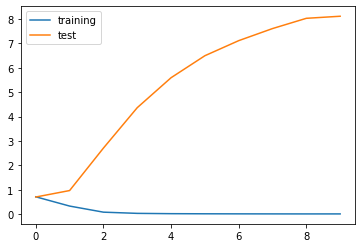

In [272]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [273]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.6166134185303515


In [274]:
torch.save(model, f'./model.pt')

In [275]:
pwd

'/content/csvs'

#텐서플로우

In [358]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
import tensorflow as tf 
%matplotlib inline 

# preprocessing sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score,roc_curve ,accuracy_score 



import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,ZeroPadding2D,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.preprocessing import LabelEncoder

In [444]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['label'], axis=1, inplace=True)
X_data = data.values

In [445]:
encoder = LabelEncoder()
scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler

y_train = encoder.fit_transform(y_data)
X_train = scaler.fit_transform(X_data)

In [331]:
X_train, X_rem, y_train, y_rem = train_test_split(X_train,y_train, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [332]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, train_size=0.8)

model_rf = RandomForestClassifier(n_estimators=20, max_depth=3,random_state=0)
model_rf.fit(X_train,y_train)

y_predict1 = model_rf.predict(X_valid)
print('accuracy :',accuracy_score(y_valid, y_predict1))
print('precision :',precision_score(y_valid, y_predict1))
print('recall :',recall_score(y_valid, y_predict1))
print('f1 score :',f1_score(y_valid, y_predict1))
print('roc auc :',roc_auc_score(y_valid, y_predict1))
confusion_matrix(y_valid,y_predict1)

accuracy : 0.6381578947368421
precision : 0.5769230769230769
recall : 0.6716417910447762
f1 score : 0.6206896551724138
roc auc : 0.6417032484635645


array([[52, 33],
       [22, 45]])

In [333]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# print(f"X_train : {X_train.shape}\nX_test : {X_test.shape}\nX_val : {X_valid.shape}\n\ny_train : {y_train.shape}\ny_test :  \
# {y_test.shape}\ny_val : {y_valid.shape}")

In [334]:
print(f"X_train_over : {X_train_over.shape}\nX_test : {X_test.shape}\nX_val : {X_valid.shape}\n\ny_train_over : {y_train_over.shape}\ny_test :  \
{y_test.shape}\ny_val : {y_valid.shape}")

X_train_over : (638, 45)
X_test : (96, 45)
X_val : (152, 45)

y_train_over : (638,)
y_test :  (96,)
y_val : (152,)


In [335]:
model = tf.keras.Sequential()
model.add(Dense(1048, activation='leaky_relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.2))
#model.add(Dense(1024, activation = 'leaky_relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
#model.add( Dense(324,activation = 'tanh'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(324 , activation = 'relu'))
#model.add(Dense(512, activation = 'relu'))
#model.add(Dense(1024 , activation = 'relu'))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dense( 1500, activation = 'relu'))
#model.add(Dense( 750 , activation = 'tanh'))
#model.add(Dense( 325 , activation = 'tanh'))
#model.add(Dense( 120, activation = 'tanh'))
#model.add(Dense(80, activation = 'tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='softmax')
)
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

# # plot model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 1048)              48208     
                                                                 
 dense_131 (Dense)           (None, 512)               537088    
                                                                 
 dropout_28 (Dropout)        (None, 512)               0         
                                                                 
 dense_132 (Dense)           (None, 256)               131328    
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_133 (Dense)           (None, 128)               32896     
                                                                 
 dropout_30 (Dropout)        (None, 128)             

In [336]:
 early_stopping = EarlyStopping(monitor='val_loss',
                           min_delta=0.002,
                           patience=10,
                        verbose=1,
                           restore_best_weights=True)                   

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.001)
model.compile(optimizer='adam',
              loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', auroc])
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=METRICS)
history = model.fit(X_train_over,y_train_over,
                    validation_data = (X_valid,y_valid),
                    epochs=20,
                    batch_size=12,
                    #callbacks=[reduce_learningrate , early_stopping]
                   )

Epoch 1/20
54/54 [==============================] - 1s 8ms/step - loss: 0.6682 - accuracy: 0.6050 - val_loss: 0.6383 - val_accuracy: 0.6645
Epoch 2/20
54/54 [==============================] - 0s 5ms/step - loss: 0.6106 - accuracy: 0.6850 - val_loss: 0.7349 - val_accuracy: 0.6711
Epoch 3/20
54/54 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.6912 - val_loss: 0.6942 - val_accuracy: 0.6513
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.5140 - accuracy: 0.7524 - val_loss: 0.6186 - val_accuracy: 0.6776
Epoch 5/20
54/54 [==============================] - 0s 5ms/step - loss: 0.4806 - accuracy: 0.7853 - val_loss: 0.6038 - val_accuracy: 0.7039
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.7774 - val_loss: 0.6564 - val_accuracy: 0.6776
Epoch 7/20
54/54 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.8135 - val_loss: 0.7006 - val_accuracy: 0.6776
Epoch 8/20
54/54 [==

In [337]:
test_loss, test_acc = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 1.7502 - accuracy: 0.6042


In [338]:
print('test_acc: ',test_acc)

test_acc:  0.6041666865348816


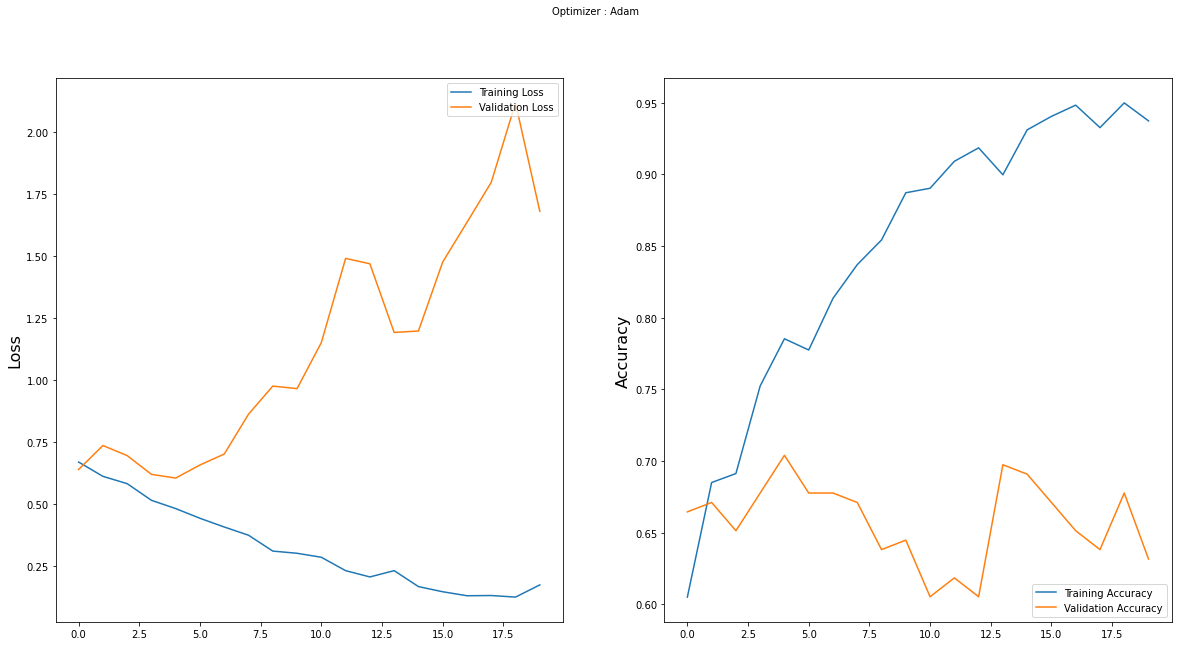

In [339]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [340]:
# summarize score
predictions = model.predict(X_test)
print(predictions[0:10])
predictions = np.round(predictions)
print(predictions[0:10])

[[4.00115699e-01 5.99884272e-01]
 [3.15661766e-02 9.68433857e-01]
 [2.08409605e-04 9.99791563e-01]
 [2.39127055e-01 7.60873020e-01]
 [1.00000000e+00 1.13619426e-10]
 [9.55582321e-01 4.44177315e-02]
 [4.74672876e-02 9.52532709e-01]
 [9.99998212e-01 1.81293444e-06]
 [9.95967269e-01 4.03276924e-03]
 [6.65440981e-04 9.99334514e-01]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [341]:
t_df = pd.DataFrame(predictions, columns = ['Negative','Positive'])
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Negative  96 non-null     float32
 1   Positive  96 non-null     float32
dtypes: float32(2)
memory usage: 896.0 bytes


In [342]:
t_df['pred']= np.select( [t_df.Negative==0 , t_df.Negative ==1] , [1 ,0] )

Model: auROC=0.600


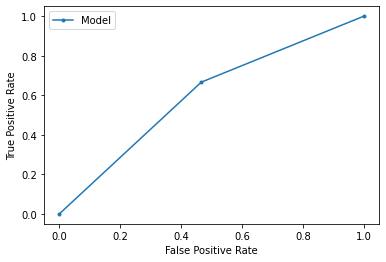

In [343]:
a = t_df.pred
print('Model: auROC=%.3f' % (roc_auc_score(y_test, a)))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, a)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#other

In [415]:
# -*- coding: utf-8 -*-
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import csv
import itertools
from imblearn.over_sampling import SMOTE
from collections import Counter
import librosa

In [416]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models

def ann_model(X_train,y_train,X_test,y_test):
  model_1 = models.Sequential()
  model_1.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
  #model_1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
  #model_1.add(layers.Dense(128, activation='relu'))
  #model_1.add(layers.Dense(1024, activation='relu'))
  #model_1.add(layers.Dense(512, activation='relu'))
  #model_1.add(layers.Dense(64, activation='relu'))
  #model_1.add(layers.Dense(10, activation='relu')
  model_1.add(layers.Dense(256, activation='relu'))
  model_1.add(layers.Dense(128, activation='relu'))
  model_1.add(layers.Dense(64, activation='relu'))
  model_1.add(layers.Dense(27, activation='relu'))
  model_1.add(layers.Dense(2, activation='softmax'))
  #compiling
  model_1.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
  model_1.summary()
  #fitting
  history = model_1.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))
  
  #evaluating
  return evaluate_model(history,X_test,y_test,model_1)

In [417]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['label'], axis=1, inplace=True)
X_data = data.values

In [418]:
def evaluate_model(history,X_test,y_test,model):
    #################### Evaluation  #########################
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Précision: %.2f%%" % (scores[1]*100))
    ##########################################################
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()

    prediction_proba=model.predict(X_test) # Get a prediction
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_test, prediction) # Compute the confusion matrix
    plot_confusion_matrix(cnf_matrix,['Negative','Positive'],True) # Plot the confusion matrix
    print(classification_report(y_test, prediction)) #Print classification report

In [419]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Class')
    plt.xlabel('Predicted Class')

In [420]:
y = label_encoder.fit_transform(y_data)
#instantiate scaler 
scaler = StandardScaler()
#fit transform scaler 
X = scaler.fit_transform(X_data)

#separating the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_153 (Dense)           (None, 512)               23552     
                                                                 
 dense_154 (Dense)           (None, 256)               131328    
                                                                 
 dense_155 (Dense)           (None, 128)               32896     
                                                                 
 dense_156 (Dense)           (None, 64)                8256      
                                                                 
 dense_157 (Dense)           (None, 27)                1755      
                                                                 
 dense_158 (Dense)           (None, 2)                 56        
                                                                 
Total params: 197,843
Trainable params: 197,843
Non-t

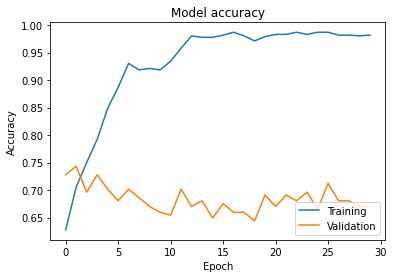

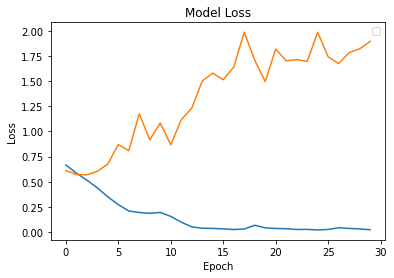

Normalize confusion matrix
              precision    recall  f1-score   support

           0       0.63      0.66      0.64        87
           1       0.70      0.68      0.69       104

    accuracy                           0.67       191
   macro avg       0.67      0.67      0.67       191
weighted avg       0.67      0.67      0.67       191



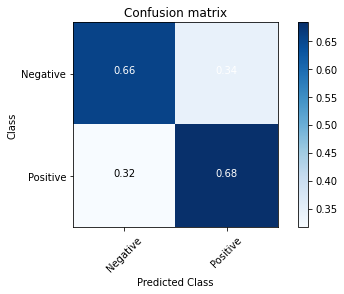

In [421]:
ann_model(X_train,y_train,X_test,y_test)

In [422]:
def cnn_model(X_train,y_train,X_test,y_test):
  im_shape=(X_train.shape[1],1)
  inputs_cnn=layers.Input(shape=(im_shape), name='inputs_cnn')
  conv1_1= layers.Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
  conv1_1=layers.BatchNormalization()(conv1_1)
  pool1=layers.MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
  conv2_1=layers.Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
  conv2_1=layers.BatchNormalization()(conv2_1)
  pool2=layers.MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
  conv3_1=layers.Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
  conv3_1=layers.BatchNormalization()(conv3_1)
  pool3=layers.MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
  flatten=layers.Flatten()(pool3)
  dense_end1 = layers.Dense(64, activation='relu')(flatten)
  dense_end2 = layers.Dense(27, activation='relu')(dense_end1)
  main_output = layers.Dense(2, activation='softmax', name='main_output')(dense_end2)
  model = models.Model(inputs= inputs_cnn, outputs=main_output)
  #compiling 
  model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
  model.summary()
  #fitting
  history = model.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))
  #evaluating
  return evaluate_model(history,X_test,y_test,model)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 45, 1)]           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 40, 64)            448       
                                                                 
 batch_normalization_6 (Batc  (None, 40, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 20, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 18, 64)            12352     
                                                                 
 batch_normalization_7 (Batc  (None, 18, 64)           256 

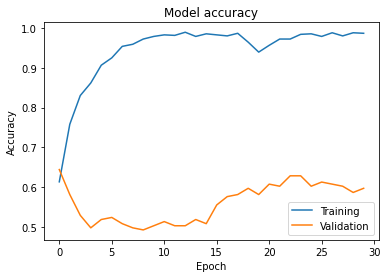

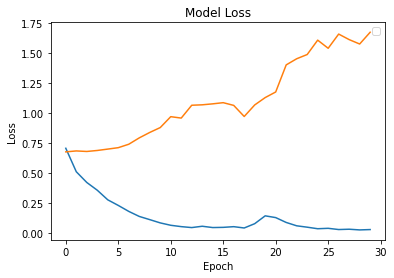

Normalize confusion matrix
              precision    recall  f1-score   support

           0       0.54      0.71      0.62        87
           1       0.68      0.50      0.57       104

    accuracy                           0.60       191
   macro avg       0.61      0.61      0.60       191
weighted avg       0.62      0.60      0.59       191



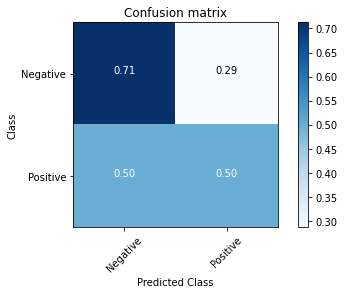

In [423]:
cnn_model(X_train,y_train,X_test,y_test)

#kaggle code

In [456]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)
data.drop(['label'], axis=1, inplace=True)
X_data = data.values

In [457]:
encoder = LabelEncoder()
scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler

y_train = encoder.fit_transform(y_data)
X_train = scaler.fit_transform(X_data)

In [458]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, train_size=0.8)

In [459]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

In [460]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.6802 - accuracy: 0.5864
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.6544
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6888
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5436 - accuracy: 0.7256
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7384
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.7880
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8360
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8704
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.8936
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9016
Epoch 11/

In [461]:
test_loss, test_acc = model.evaluate(X_valid,y_valid)

10/10 [==============================] - 0s 3ms/step - loss: 2.7828 - accuracy: 0.5879


In [462]:
print('test_acc: ',test_acc)

test_acc:  0.5878594517707825


In [463]:
predictions = model.predict(X_valid)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(predictions[:4])
print(y_test[:4])

(2,)
1.0
[[9.9416441e-01 5.8356132e-03]
 [7.9276353e-02 9.2072362e-01]
 [8.0174100e-01 1.9825903e-01]
 [1.0000000e+00 4.7328207e-08]]
tensor([[0],
        [1],
        [0],
        [0]])
